In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import abspath
import random
import time

In [3]:
def load_data(path):
    input_file = open(path)
    output_data = []
    for line in input_file:
        one_row = ['1']
        one_row += line.split(',')
        output_data.append([float(x) for x in one_row])

    print('Input data info.')
    print('\tVariable amount: %d, training set size %d' % (len(output_data[0]) - 1, len(output_data)))
    return np.array(output_data)

In [4]:
def display_logistic_data(data, labels=None):
    a_data = data[data[:, -1] == 0]
    b_data = data[data[:, -1] == 1]

    plot_regression = plt.figure().add_subplot(111)
    plot_regression.scatter(a_data[:, 1], a_data[:, 2], s=10, color='blue')
    plot_regression.scatter(b_data[:, 1], b_data[:, 2], s=10, color='red')

    if labels is not None:
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])
        plt.title(labels[2])

In [5]:
def display_predicted(data, theta, labels):
    a_data = []
    b_data = []
    for item in data:
        if hyp_value(item, theta) > 0.5:
            a_data.append(item)
        else:
            b_data.append(item)
            
    a_data = np.array(a_data)
    b_data = np.array(b_data)

    plot_prediction = plt.figure().add_subplot(111)
    plot_prediction.scatter(a_data[:, 1], a_data[:, 2], s=10, color='green')
    plot_prediction.scatter(b_data[:, 1], b_data[:, 2], s=10, color='magenta')
    
    if labels is not None:
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])
        plt.title(labels[2])

In [6]:
def display_all_plots():
    plt.show()

In [7]:
def compare_theta(a, b):
    delta = 0.0001
    for i in range(len(a)):
        if abs(a[i] - b[i]) > delta:
            return False

    return True

In [8]:
def display_convergence(data):
    convergence_plot_data = np.array(data)
    convergence_plot = plt.figure().add_subplot(111)
    plt.xlabel('Iteration, N')
    plt.ylabel('Cost function, J')
    plt.title('Cost function convergence')
    convergence_plot.plot(convergence_plot_data[:, 0], convergence_plot_data[:, 1])

In [9]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))


def hyp_value(x, theta):
    x = np.array(x)
    theta = np.array(theta)
    return sigmoid((x * theta).sum())

In [10]:
def normalize_all(data):
    for i in range(1, len(data[0])):
        data[:, i] = scale_normalize(data[:, i])

    return data


def scale_normalize(lst):
    return lst / np.mean(lst)

In [11]:
def compute_cost_function(x_data, y_data, theta):
    temp_sum = 0.0
    coefficient = -1 / len(x_data)
    fake_zero = 10 ** (-9)
    for i in range(len(x_data) - 1):
        hyp = hyp_value(x_data[i], theta)
        temp_sum += y_data[i] * np.log(hyp if hyp != 0.0 else fake_zero) \
            + (1.0 - y_data[i]) * np.log(1 - hyp if 1 - hyp != 0.0 else fake_zero)
 
    return temp_sum * coefficient

In [12]:
def compute_partial_derivative(x_data, y_data, theta, j):
    result = 0.0
    for i in range(len(x_data)):
        result += (hyp_value(x_data[i], theta) - y_data[i]) * x_data[i][j]

    return result / len(x_data)

In [13]:
def gradient_step(x, y, theta, alpha):
    return [theta[i] - alpha * compute_partial_derivative(x, y, theta, i) for i in range(len(theta))]

In [14]:
def gradient_descent(x_data, y_data, theta, alpha, iterations):
    prev_theta = list(theta)
    convergence_plot_data = []
    for i in range(1, iterations):
        theta = gradient_step(x_data, y_data, theta, alpha)
        if compare_theta(prev_theta, theta):
            print('\tEstimated iterations: %d' % i)
            break

        prev_theta = list(theta)
        convergence_plot_data.append([i, compute_cost_function(x_data, y_data, theta)])
    
    if convergence_plot_data:
        display_convergence(convergence_plot_data)
    
    return theta

Input data info.
	Variable amount: 3, training set size 100
Gradient params.
	Randomly generated theta vector: [0 - 0.8994] [1 - 0.9674] [2 - 0.2403] 
	Alpha:                           3.000000
	Max iteration count:             10000

Gradient descent started...


	Estimated iterations: 6748
	Estimate time: 17.62 sec
Gradient descent finished.


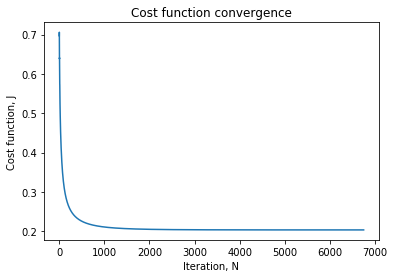

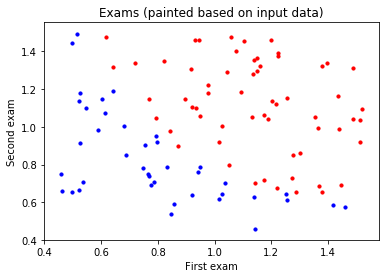

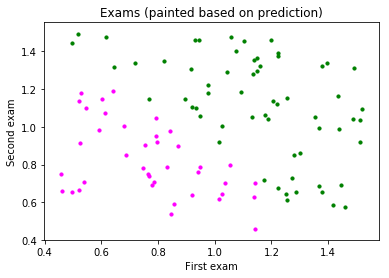

In [15]:
def compute_logistic_regression(with_normalization=True):
    data = load_data(abspath('demo\init\coursera\logisticregression\data\ex2data1.txt'))
    
    # data normalization to speed up gradient descent
    x_data = normalize_all(data[:, :-1]) if with_normalization else data[:, :-1]
    y_data = data[:,  -1]
    
    theta = [random.uniform(0, 1) for i in range(len(x_data[0]))]
    alpha = 3.0
    iterations = 10000

    print('Gradient params.')
    print('\tRandomly generated theta vector: ', end='')
    [print('[%d - %.4f]' % (i, theta[i]), end=' ') for i in range(len(theta))]
    print('\n\tAlpha:                           %f' % alpha)
    print('\tMax iteration count:             %d' % iterations)
    print('\nGradient descent started...')
    start_time = time.time()
    theta = gradient_descent(x_data, y_data, theta, alpha, iterations)
    end_time = time.time() - start_time
    print('\tEstimate time: %.2f sec' % end_time)
    print('Gradient descent finished.')
    
    display_logistic_data(data, ['First exam', 'Second exam', 'Exams (painted based on input data)'])
    display_predicted(x_data, theta, ['First exam', 'Second exam', 'Exams (painted based on prediction)'])

compute_logistic_regression()
display_all_plots()